In [3]:
# import libraries
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load dataset
dirname = 'train.csv'
train_file = os.path.join(dirname)
df_train = pd.read_csv(train_file)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# load test data
dirname = 'test.csv'
test_file = os.path.join(dirname)
df_test = pd.read_csv(test_file)
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
df_train.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [8]:
# drop 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'
df_train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], inplace=True, axis=1)

In [9]:
qualitative_cols = [c for c in df_train.columns if df_train[c].dtype == object]
quantative_cols = [c for c in df_train.columns if df_train[c].dtype != object]
for c in qualitative_cols:
    df_train[c] = df_train[c].astype('category')

In [10]:
x = df_train.isna().sum()
x[x > 0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [11]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
df_train.describe(include='category').T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260
Condition2,1460,8,Norm,1445


In [13]:
# drop unbalanced categorical columns
unbalanced_columns = ['MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'ExterCond', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
df_train.drop(unbalanced_columns, axis=1, inplace=True)
df_train.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,Reg,CollgCr,2Story,7,5,2003,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,Reg,Veenker,1Story,6,8,1976,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,IR1,CollgCr,2Story,7,5,2001,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,IR1,Crawfor,2Story,7,5,1915,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,IR1,NoRidge,2Story,8,5,2000,...,192,84,0,0,0,0,0,12,2008,250000


In [14]:
df_train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

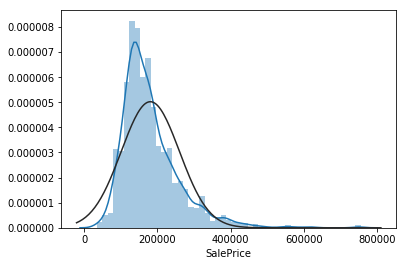

In [15]:
from scipy.stats import norm
sns.distplot(df_train.SalePrice,fit=norm);

In [16]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'].values.ravel())

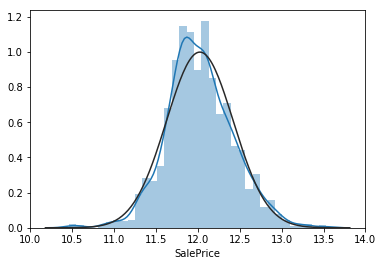

In [17]:
sns.distplot(df_train.SalePrice,fit=norm);

In [18]:
# updating columns 
qualitative_cols = [c for c in df_train.columns if df_train[c].dtype.name == 'category']
quantative_cols = [c for c in df_train.columns if df_train[c].dtype.name != 'category']

In [19]:
# fill null values for categorical features with mode
for col in qualitative_cols:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])

In [20]:
df_train[qualitative_cols].isnull().sum()

LotShape        0
Neighborhood    0
HouseStyle      0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
ExterQual       0
Foundation      0
BsmtQual        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
HeatingQC       0
KitchenQual     0
GarageType      0
GarageFinish    0
dtype: int64

In [21]:
x_dummy = pd.get_dummies(data=df_train[qualitative_cols],drop_first=True)
print(x_dummy.shape)
x_dummy['Id'] = df_train['Id']
x_dummy.isnull().sum().sort_values()

(1460, 104)


LotShape_IR2            0
BsmtQual_Gd             0
BsmtQual_Fa             0
Foundation_Wood         0
Foundation_Stone        0
Foundation_Slab         0
Foundation_PConc        0
Foundation_CBlock       0
ExterQual_TA            0
ExterQual_Gd            0
ExterQual_Fa            0
BsmtQual_TA             0
MasVnrType_Stone        0
MasVnrType_BrkFace      0
Exterior2nd_Wd Shng     0
Exterior2nd_Wd Sdng     0
Exterior2nd_VinylSd     0
Exterior2nd_Stucco      0
Exterior2nd_Stone       0
Exterior2nd_Plywood     0
Exterior2nd_Other       0
Exterior2nd_MetalSd     0
Exterior2nd_ImStucc     0
MasVnrType_None         0
BsmtExposure_Gd         0
BsmtExposure_Mn         0
BsmtExposure_No         0
GarageFinish_RFn        0
GarageType_Detchd       0
GarageType_CarPort      0
                       ..
LotShape_IR3            0
Neighborhood_IDOTRR     0
Neighborhood_StoneBr    0
Neighborhood_Timber     0
Neighborhood_Veenker    0
Exterior2nd_Brk Cmn     0
Exterior2nd_AsphShn     0
Exterior1st_

In [22]:
print(df_train.shape)
print(x_dummy.shape)

(1460, 54)
(1460, 105)


In [23]:
df_train = df_train.merge(x_dummy)
print(df_train.shape)

(1460, 158)


In [24]:
df_train.drop(qualitative_cols, inplace=True, axis=1)
qualitative_cols = [c for c in df_train.columns if df_train[c].dtype.name == 'category']
qualitative_cols

[]

In [25]:
df_train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=142)

In [26]:
df_train.drop(['Id'], inplace=True, axis=1)

In [27]:
#selected_features = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','KitchenAbvGr','EnclosedPorch']
#df_train[selected_features].corr().style.background_gradient(cmap='coolwarm').set_precision(4)

In [28]:
#df_train[selected_features].isnull().sum()

In [29]:
quantative_cols = [c for c in df_train.columns if df_train[c].dtype.name != 'category']
len(quantative_cols)

141

In [30]:
df_train[quantative_cols].isnull().sum().sort_values(ascending=False)

LotFrontage             259
GarageYrBlt              81
MasVnrArea                8
GarageFinish_Unf          0
Neighborhood_Crawfor      0
Neighborhood_Mitchel      0
Neighborhood_MeadowV      0
Neighborhood_IDOTRR       0
Neighborhood_Gilbert      0
Neighborhood_Edwards      0
Neighborhood_ClearCr      0
Neighborhood_CollgCr      0
Neighborhood_NPkVill      0
Neighborhood_BrkSide      0
Neighborhood_BrDale       0
Neighborhood_Blueste      0
LotShape_Reg              0
LotShape_IR3              0
Neighborhood_NAmes        0
Neighborhood_NWAmes       0
SalePrice                 0
Neighborhood_NoRidge      0
Neighborhood_NridgHt      0
Neighborhood_OldTown      0
Neighborhood_SWISU        0
Neighborhood_Sawyer       0
Neighborhood_SawyerW      0
Neighborhood_Somerst      0
Neighborhood_StoneBr      0
Neighborhood_Timber       0
                       ... 
Exterior1st_Wd Sdng       0
Exterior1st_VinylSd       0
Exterior1st_Stucco        0
Exterior1st_Stone         0
Exterior1st_MetalSd 

In [31]:
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(np.mean(df_train['GarageYrBlt']))
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(np.mean(df_train['LotFrontage']))
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(np.mean(df_train['MasVnrArea']))

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(df_train.drop('SalePrice', axis=1), df_train['SalePrice'], test_size=0.3, random_state=0)

In [33]:
#X_train = df_train[selected_features]
#Y_train = df_train['SalePrice']

In [34]:
import statsmodels.api as sm 

z = sm.add_constant(X_train)
results = sm.OLS(Y_train,z).fit()
print(results.summary())

C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     72.56
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:59:19   Log-Likelihood:                 757.52
No. Observations:                1022   AIC:                            -1241.
Df Residuals:                     885   BIC:                            -565.7
Df Model:                         136                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   13.7641 

In [35]:
print((results.pvalues < .05).sum())

38


In [36]:
selected_features = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Stone', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA']

In [37]:
#selected_features = ['OverallQual','GarageCars','TotalBsmtSF','TotRmsAbvGrd','YearRemodAdd','MasVnrArea','Fireplaces','BsmtFinSF1','WoodDeckSF','KitchenAbvGr']

In [38]:
X_train = X_train[selected_features]
X_val = X_val[selected_features]

In [39]:
#X_val

In [40]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_val = sc.fit_transform(X_val)

In [41]:
X_train.shape

(1022, 25)

In [42]:
z = sm.add_constant(X_train)
results = sm.OLS(Y_train,z).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     301.9
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:59:24   Log-Likelihood:                 579.57
No. Observations:                1022   AIC:                            -1107.
Df Residuals:                     996   BIC:                            -979.0
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.6256      0.65

In [43]:
X_train.drop(['1stFlrSF', 'PoolArea', 'Foundation_CBlock', 'Foundation_Stone', 'BsmtQual_Fa'], inplace=True, axis=1)
X_val.drop(['1stFlrSF', 'PoolArea', 'Foundation_CBlock', 'Foundation_Stone', 'BsmtQual_Fa'], inplace=True, axis=1)

In [44]:
z = sm.add_constant(X_train)
results = sm.OLS(Y_train,z).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     376.2
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:59:25   Log-Likelihood:                 575.95
No. Observations:                1022   AIC:                            -1110.
Df Residuals:                    1001   BIC:                            -1006.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.1381      0.544  

In [45]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [46]:
linear_predictions = lm.predict(X_val)

In [47]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_val, linear_predictions))
print('MSE:', metrics.mean_squared_error(Y_val, linear_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_val, linear_predictions)))
lm_RMSE=np.sqrt(metrics.mean_squared_error(Y_val, linear_predictions))

MAE: 0.09764695542601919
MSE: 0.034903360832531365
RMSE: 0.1868244117681931


In [48]:
from sklearn.metrics import r2_score
r2_score(Y_val, linear_predictions)

0.7741018690986852

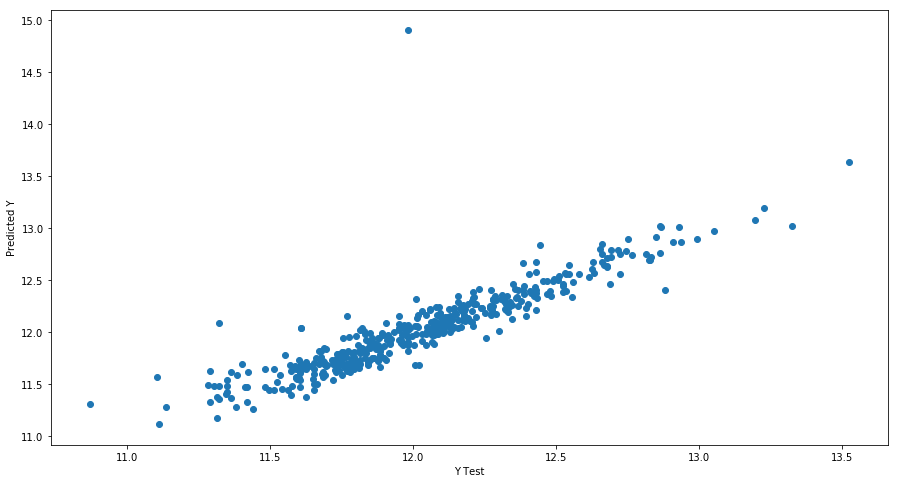

In [49]:
plt.figure(figsize=(15,8))
plt.scatter(Y_val,linear_predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [50]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [51]:
# drop 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'
df_test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], inplace=True, axis=1)

In [52]:
qualitative_cols = [c for c in df_test.columns if df_test[c].dtype == object]
quantative_cols = [c for c in df_test.columns if df_test[c].dtype != object]
for c in qualitative_cols:
    df_test[c] = df_test[c].astype('category')

In [53]:
# drop unbalanced categorical columns
unbalanced_columns = ['MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'ExterCond', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
df_test.drop(unbalanced_columns, axis=1, inplace=True)

In [54]:
# updating columns 
qualitative_cols = [c for c in df_test.columns if df_test[c].dtype.name == 'category']
quantative_cols = [c for c in df_test.columns if df_test[c].dtype.name != 'category']

In [55]:
# fill null values for categorical features with mode
for col in qualitative_cols:
    df_test[col] = df_test[col].fillna(df_test[col].mode()[0])

In [56]:
x_dummy = pd.get_dummies(data=df_test[qualitative_cols],drop_first=True)
print(x_dummy.shape)
x_dummy['Id'] = df_test['Id']
x_dummy.isnull().sum().sort_values()

(1459, 100)


LotShape_IR2            0
BsmtQual_TA             0
BsmtQual_Gd             0
BsmtQual_Fa             0
Foundation_Wood         0
Foundation_Stone        0
Foundation_Slab         0
Foundation_PConc        0
Foundation_CBlock       0
ExterQual_TA            0
ExterQual_Gd            0
ExterQual_Fa            0
MasVnrType_Stone        0
MasVnrType_None         0
MasVnrType_BrkFace      0
Exterior2nd_Wd Shng     0
Exterior2nd_Wd Sdng     0
Exterior2nd_VinylSd     0
Exterior2nd_Stucco      0
Exterior2nd_Stone       0
Exterior2nd_Plywood     0
Exterior2nd_MetalSd     0
BsmtExposure_Gd         0
BsmtExposure_Mn         0
BsmtExposure_No         0
BsmtFinType1_BLQ        0
GarageFinish_RFn        0
GarageType_Detchd       0
GarageType_CarPort      0
GarageType_BuiltIn      0
                       ..
LotShape_Reg            0
LotShape_IR3            0
Neighborhood_SawyerW    0
Neighborhood_Somerst    0
Neighborhood_StoneBr    0
Neighborhood_Timber     0
Exterior2nd_BrkFace     0
Exterior2nd_

In [57]:
df_test = df_test.merge(x_dummy)
print(df_test.shape)

(1459, 153)


In [58]:
df_test.drop(qualitative_cols, inplace=True, axis=1)
qualitative_cols = [c for c in df_test.columns if df_test[c].dtype.name == 'category']
qualitative_cols

[]

In [59]:
quantative_cols = [c for c in df_train.columns if df_train[c].dtype.name != 'category']
len(quantative_cols)

141

In [60]:
df_test.isnull().sum().sort_values(ascending=False)

LotFrontage             227
GarageYrBlt              78
MasVnrArea               15
BsmtHalfBath              2
BsmtFullBath              2
BsmtFinSF1                1
GarageCars                1
GarageArea                1
TotalBsmtSF               1
BsmtUnfSF                 1
BsmtFinSF2                1
Neighborhood_NPkVill      0
Neighborhood_Edwards      0
Neighborhood_Crawfor      0
Neighborhood_Gilbert      0
Neighborhood_IDOTRR       0
Neighborhood_MeadowV      0
Neighborhood_CollgCr      0
Neighborhood_ClearCr      0
Neighborhood_BrkSide      0
Neighborhood_BrDale       0
Neighborhood_Mitchel      0
Neighborhood_NAmes        0
GarageFinish_Unf          0
Neighborhood_NWAmes       0
Neighborhood_NoRidge      0
Neighborhood_NridgHt      0
LotShape_Reg              0
Neighborhood_OldTown      0
Neighborhood_SWISU        0
                       ... 
Exterior1st_BrkComm       0
Exterior1st_BrkFace       0
Exterior1st_CBlock        0
Exterior1st_CemntBd       0
Exterior1st_HdBoard 

In [61]:
df_test.fillna(np.mean(df_test, axis=0), inplace=True)

In [62]:
X_test = df_test[selected_features]

In [63]:
X_test.drop(['1stFlrSF', 'PoolArea', 'Foundation_CBlock', 'Foundation_Stone', 'BsmtQual_Fa'], inplace=True, axis=1)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [64]:
linear_predictions_test = lm.predict(X_test)

In [65]:
linear_predictions_test

array([11.75879474, 11.96399361, 12.04905316, ..., 12.14427097,
       11.65021939, 12.28443104])

In [68]:
final_test_data= pd.DataFrame()
final_test_data['Id'] = df_test.Id.astype("int32")
final_test_data['SalePrice'] = np.e**linear_predictions_test -1
final_test_data.to_csv('submission.csv', index=False)

In [ ]:
#X_test = df_test[selected_features]
#X_test = X_test.fillna(np.mean(X_test, axis=0))

In [67]:
#y_test_predicted = lm.predict(X_test)

#df_test['SalePrice'] = y_test_predicted

#df_test.head()

In [ ]:
#df_test[['Id', 'SalePrice']].to_csv('/kaggle/working/submission.csv', index=False)